# Comparing Open-Meteo vs. Solcast

Strategy no longer has access to the Solcast API which we used in FSGP 2024 for predicting irradiance and for ground-truth values for past irradiance.

A free alternative, [Open-Meteo](https://open-meteo.com/) is available for us to use and has some promising features:
- **both** historical archives and forecasts
- 10,000 daily API calls for non-commercial use
- rich irradiance data with hourly granularity, including GHI, DNI, DHI and more
- automatic generation of Python queries using its simple web GUI

Switching to Open-Meteo, or at least using it partially or as a backup could be beneficial to Strategy as it provides a more permanent solution than depending on a subscription or sponsorship from Solcast.

However, Solcast is used by many other top solar racing teams so we have a relatively high confidence in its accuracy. That said, we have not yet validated Solcast data to accurately predict our charging power.

In changing from Solcast to Open-Meteo, it is worth comparing their values so that we can see if they agree: strong alignment would provide us with increased confidence with both tools. Poor alignment would indicate a need to further investigate the tools' accuracies.

Coordinates 37.01230239868164°N -86.31924438476562°E
Elevation 161.0 m asl
Timezone b'America/Chicago' b'CDT'
Timezone difference to GMT+0 -18000 s


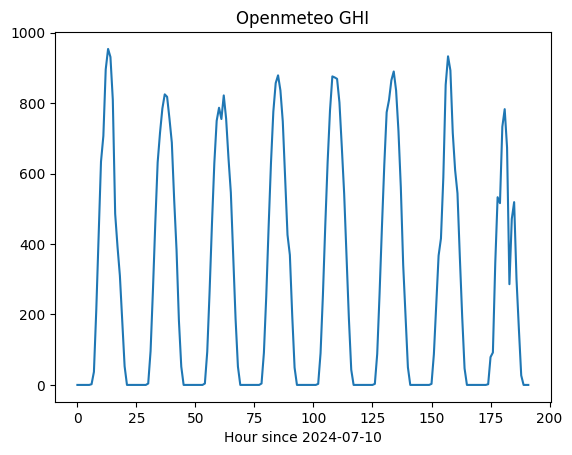

In [40]:
from request_irradiance import get_irradiance_archive
import matplotlib.pyplot as plt
import pandas as pd

# Define parameters for FSGP 2024
NCM_MOTORSPORTS_LAT = 37.0006332
NCM_MOTORSPORTS_LONG = -86.3709907
FSGP_START_DAY = "2024-07-10"  # Use these dates because this is what we have exported as a CSV
FSGP_END_DAY = "2024-07-17"
FSGP_TIMEZONE = "America/Chicago"

hourly_irradiance = get_irradiance_archive(NCM_MOTORSPORTS_LAT,
                                           NCM_MOTORSPORTS_LONG,
                                           FSGP_START_DAY,
                                           FSGP_END_DAY,
                                           FSGP_TIMEZONE)

openmeteo_ghi = hourly_irradiance["shortwave_radiation"].values
plt.plot(openmeteo_ghi)
plt.xlabel(f"Hour since {FSGP_START_DAY}")
plt.title('Openmeteo GHI')
plt.show()

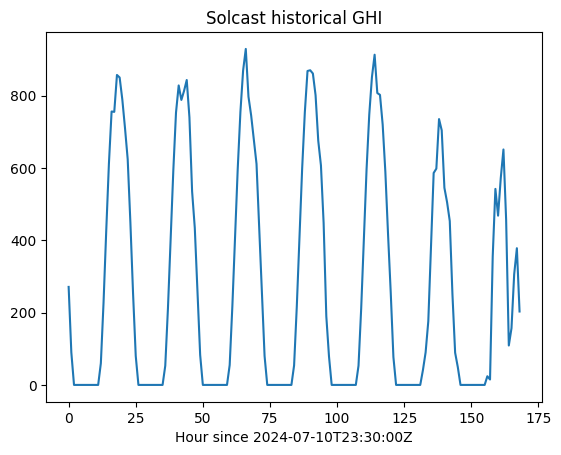

In [45]:
# This CSV file was exported as historical values (after-the-fact) during FSGP 2024, before our access expired
with open("../data/solcast_historical_16_17.csv") as f:
    solcast_data = pd.read_csv(f)

rows, cols = solcast_data.shape
solcast_ghi = solcast_data["ghi"][::-2].values  # first element is last timestamp, and times are every half-hour
plt.plot(solcast_ghi)
plt.xlabel(f"Hour since {solcast_data["period_end"][rows - 1]}")
plt.title('Solcast historical GHI')
plt.show()

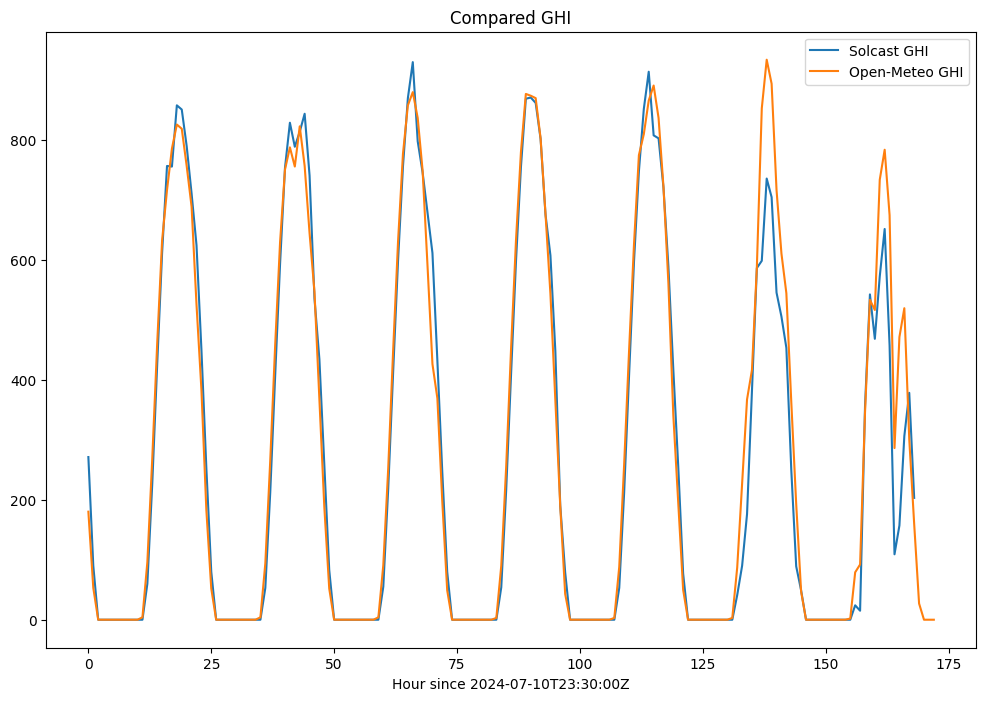

In [54]:
om_hours_ahead = 19
plt.figure(figsize=(12, 8))
plt.plot(solcast_ghi, label="Solcast GHI")
plt.plot(openmeteo_ghi[om_hours_ahead:], label="Open-Meteo GHI")
plt.xlabel(f"Hour since {solcast_data["period_end"][rows - 1]}")
plt.title('Compared GHI')
plt.legend(loc="upper right")
plt.show()

We see that the values line up very closely on days with full sun, however there are significant discrepancies visible on cloudy days: we need to investigate this further if we rely on Open-Meteo in the future.